In [2]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
columns = ['tweet_id','timestamp','tweet_text','user_id',
           'tweet_coords','tweet_coords_list','tweet_long','tweet_lat','location',
           'enc_url','tweet_lang','hashtags']

In [4]:
tweet_full = pd.read_csv(r'./tweetCoords.csv',
                         header=None,
                         names=columns,
                         parse_dates=[1],
                         infer_datetime_format=True,
                         index_col='timestamp')

In [5]:
tweet_date = pd.to_datetime("2017-09-08 00:00:00")
date_delta = pd.Timedelta("24HR")

In [6]:
tweet_text = tweet_full.loc[tweet_date:tweet_date + date_delta,"tweet_text"]

regex patterns (testing)
- urls: `https?:\/\/\S+`
- hashtags: `#\S+`
- two-letter words: `\b[A-Za-z]{2}\b`



In [33]:
tweet_stops = stopwords.words('english')

In [7]:
tweet_text = tweet_text.str.replace('https?:\/\/\S+','')

In [8]:
tweet_tokenizer = TweetTokenizer(strip_handles=True,preserve_case=False,reduce_len=True)

Experimenting with stopwords.

In [47]:
[word for word in tweet_tokenizer.tokenize(x) if word not in tweet_stops]

['done', 'went', 'messed', 'mood']

In [48]:
# tweets_tokens = tweet_text.apply(tweet_tokenizer.tokenize)
tweets_tokens = tweet_text.apply(lambda x: [word for word in tweet_tokenizer.tokenize(x) if word not in tweet_stops])

In [49]:
vector_model = Word2Vec(tweets_tokens, min_count=15, sg=1, window=4)
word_matrix = vector_model.wv[vector_model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(word_matrix)

In [50]:
word_matrix.shape

(1384, 100)

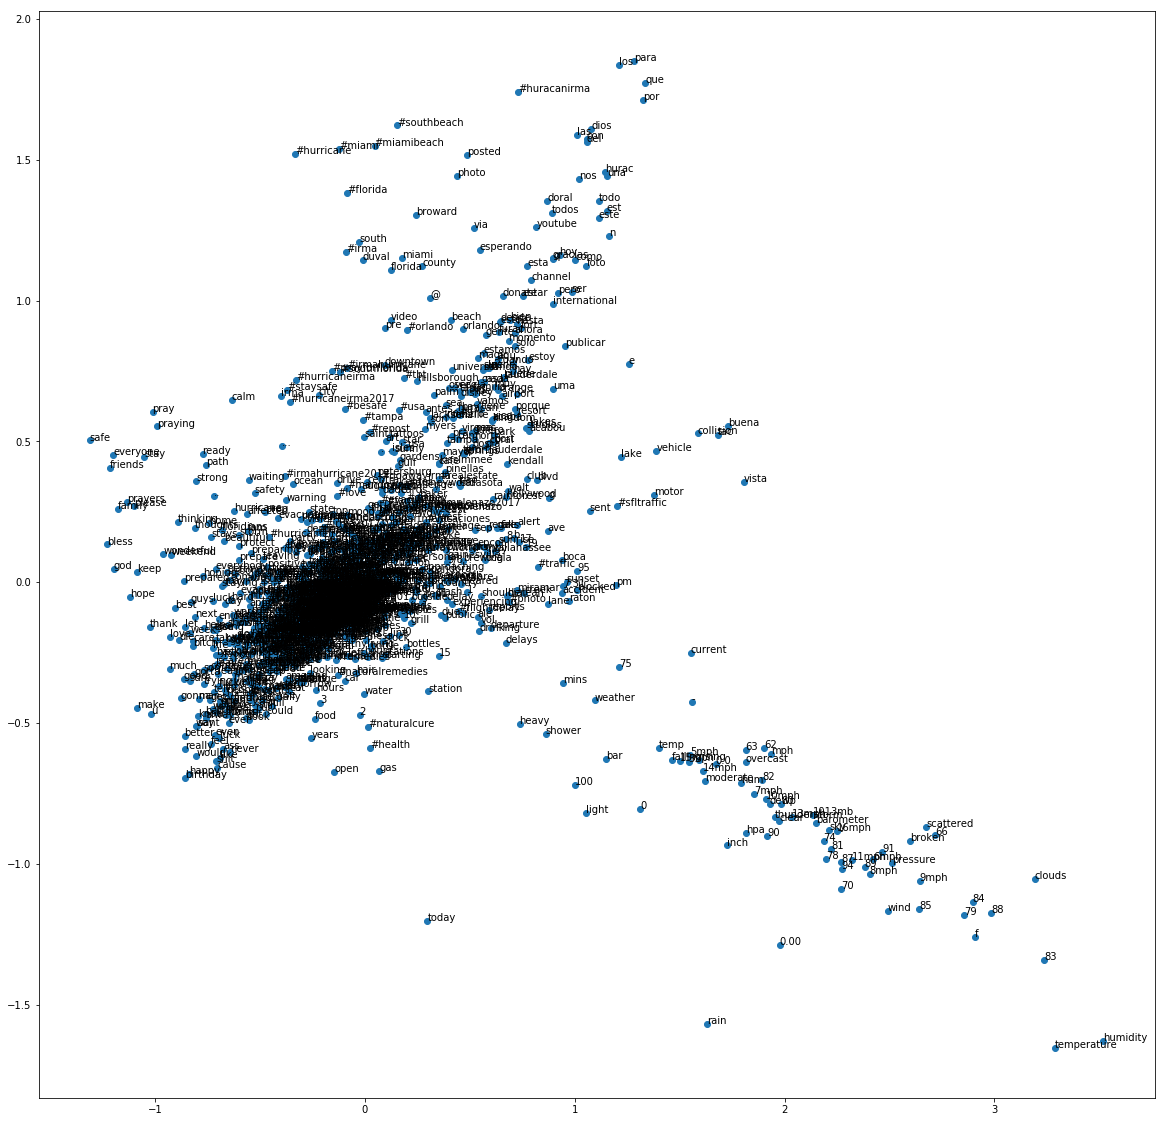

In [52]:
plt.figure(figsize=(20,20))
plt.scatter(result[:, 0], result[:, 1])
words = list(vector_model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [14]:
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import ColumnDataSource
output_notebook()
TOOLS="""hover,crosshair,pan,wheel_zoom,box_zoom,reset,tap,save"""

word_data = ColumnDataSource(
    data=dict(
        word_val = words,
        x_val = result[:,0].tolist(),
        y_val = result[:,1].tolist()
    )
)

TOOLTIPS = [
    ("Word", "@word_val"),
    ("(x,y)","($x, $y)")
]
vector_fig = figure(tools=TOOLS, tooltips=TOOLTIPS)
vector_fig.scatter('x_val','y_val',source=word_data)

show(vector_fig)

Loading BokehJS ...